# Introduction

For this assignment, I have built a program that is able to:
- Read in a csv file 
- View and tidy the data
- Generate summary statistics and multiple visualisations 
- Execute ANOVA and post hoc analyses. 
- Handle basic errors

The Docker file containing the program script and data file is available at:

https://hub.docker.com/repository/docker/hschneider725/anova_program

Alternatively, you can find the repository at:
https://github.com/shimthal61/Python_Programming_Assignment. 

Please read through the README.md file before running the script.

I will break down the program into key components to aid my explanations. At the end of the markdown document, I have run the program in its entirety. Refer to the output in each section to see what each component of the script does.

# Packages

To load in the packages, we first bring them in using the `import` keyword. We then specify what we want to call to use the function using the `as` keyword. The `{numpy}` package will allow us to work with arrays in our dataset and provides the means to generate specific descriptive statistics. `{pandas}` allows us to read in our csv file, whilst `{seaborn}` provides attractive and informative data visualisations based on `{matplotlib}`, a library for creating visualisations. The `ols()` function imported from `{statsmodels.formula.api}` creates models from a formula and dataframe, while `stats()` from `{scipy}` enables us to run t-tests. Finally, we use `AnovaRM()` from `{statsmodels.stats.anova}` to perform repeated measures ANOVA in fully balanced designs.

# load_data_function()

First of all, I introduce the program within the `print()` function. Following, I use the `def` keyword to define my first function - `load_data_function()`. Any variables created or changed within a variable will be stored locally within that variable by default. If such a variable was called outside the function, it won't be recognised. Therefore, I use the `global` keyword to make all the variables that I want to use outside the function accessible. Once all the appropriate variables have been modified to be global, I create a new variable called `file`. By using the `input()` function, I can make the value of `file` equalivalent to whatever the user enters. The input was preceded by some information about what was required from the user. I then add my first `if` statement, where the following indented code will only run if the statement was met. The requirements for it to run are for `file` to contain the string `.csv`. This is a basic error-handling technique which prevents the user from attempting to read in a non-csv file type. If the `if` statement was met, the following code reads in the data using the `{pandas}` `pd.read_csv()` function and renames the first data column 'Participant'. Through the use of indexing combined with the `unique()` function, it also maps all the salient aspects of the data, including the columns and levels, on to defined variables. However, it is worth noting that, in its current state, the program will not run properly if the data columns are not in the following order - Participant, IV1, IV2, DV. If the file inputted by the user does not contain the string `.csv`, then my `else` statement will run, which tells the user to ensure the file was of csv type. Within the `else` statement, I also added my first `again` function, which I'll be using substantially throughout the code. As I subsequently define, the `load_data_function_again()` function simply repeats the `load_data_function()`. The final lines of code determines where the defined functions ends. 

# anova_function()

Once the data has been loaded in, the `load_data_function()` will not run again. From here, all the respective code will be nested within the `anova_function()`. I create a new variable, `options`, which will allow the user to navigate through a variety of different choices. The message I've attached to the function fits within triple quotes, which allows the string to be written on to a few different lines.

# Option 1  - Viewing the data frame

This line of code is fairly simple. If options was equal to 1 (dictated by `==1`), a brief description of the function will appear, followed by the first and last 5 rows of the dataframe generated using the `display()` function. The data could use a few improvements to advance interpretability, which our next function enables.

# Option 2 - Tidying the data

In option 2, I used the `elif` keyword, which translates to 'else/if' and continues any `if` statement. I first defined `tidy_data_function()`, then made the variables I manipulated global. Following this, the user has the option to rename the columns or the levels through the use of the `input()` variable `columns_levels`. If 1 was entered, then the variables `IV1`, `IV2`, and `DV` will be updated to match the input. This was carried out by mapping the new entered variables onto a new dataset, then passing this into `data` using the `rename()` function. In the output below, I changed IV1 and IV2 to title case, and renamed the DV 'Reaction Time' 

If the user opts to tidy the levels, then my `Which_IV_function()` will run, followed by the appropriate `global` variables. They are then presented with another two options, renaming the first IV, or the second. The string message attached to the `Which_IV` input variable includes the `IV1` and `IV2` variables, which will change depending on the dataset. I also utilised the 'new line character' `\n` to break up the string and place the following text on a new line. The following code words similar to the renaming columns function, except that we used `replace()` instead of `rename()`  to modify the data points in our dataset. In the event that the user decides to skip the data tidying option, we mapped our new levels on to the old ones (e.g. `IV1_LVL1 = new_IV1_LVL1`) , which means that we won't have to differentiate when calling them in later functions. In the output below, I removed the 'prime' and 'target' strings from the dataset and changed 'positive' and 'negative' to title case.  

To be able to navigate around the program, I added the option to go back during various stages. By adding another `elif` statement, if the user enters 'b' at any point in the appropriate inputs, then the program will run the preceding function. 

I added an `else` statement which produces an error message and reruns the program to handle situations where the user might input something outside of the `if` and `elif` statements. Finally, I defined where my functions concluded.

If we view the dataframe in our output, we can see that the columns and data have been labelled appropriately.

# Option 3 - Summary Statistics

If the user picks option '3', they are first shown a brief asthetic message describing the process. To generate summary statistics, I first used the `loc()` function to remove the column `participant` from the dataset using the `data.columns!=participant` argument, as the participants' number adds nothing to the summary stats. I then grouped `IV1` and `IV2` together using the `groupby()` function, which splits them and allows us to generate seperate summary stats before combining the results. Finally, I utilised the `aggregate` function to generate the actual descriptives, defining what stats we want using the `numpy` arguments. I wrapped all this code within the `display()` function so that the output was returned for the user.

In our output, it looks as though participants were quickest at responding to a target image when the image's valence was consistent with the prime image preceding it.

# Option 4 - Data Visualisations

If the user entered option '4, they will be required to input what their dependent variable was measured in, which I used later in the visualisations. The user was then presented with 7 different visualisation options. Using `if` statements, I mapped the `vis_type` input on to a new `vis_type` variable, the names of which are alligned to what kind of graph the user called for. Each visualisation's `if` statement also contained the variable `ci`, which corresponded to the confidence interval sizes. I used `vis_type` and `ci` variables later.

I decided to use the `{seaborn}` package to develop my visualisations, as the syntax is fairly simplistic. The `catplot` function is a relatively new addition to seaborn, and provided a framework for several types of plots that show the relationship between a numerical variable and one or more categorical variables. The graphs are intuitively designed by default, allowing me to keep the code short and concise. The different plots were easily be specifed within the `kind` argument. I decided to give the user access to 7 of the `catplot` graphics, as different plots can aid data interpretability.  

To create the plot, we used the function `sns.catplot()` to call `{seaborn}` and directed it to create a catplot. Within the function, we added the data from `Prime` and `Reaction Time` to the x and y axes, respectively. To add in our `Target` data as a second categorical variable, we called it in the `hue` argument. We next specified the name of our source dataframe, and what type of catplot we wanted to create. I set the `kind` parameter to be whatever the `vis_type` variable was defined as (e.g. 'strip', or 'point'). I also set the confidence intervals to be appropriate to the visualisation by passing the `ci` variable to the `ci` parameter. Finally, I adjusted the aspect ratio to 1.5x size, to promote readability.

The `{matplotlib}` function `plt.title()` added a title to the plot. Using the variables `IV1`, `IV2`, and `DV`, the title adjusted depending on the dataset, which modified the title to make it applicable to different datasets. Using `title()` we also made our `vis_type` variable title case so that it was consistent with the rest of the plot title. 

`plt.ylabel()` let us rename our y-axis label. We used the `DV_meas` variable the user valued earier to pass the appropriate measure to the label. Finally, we applied `plt.show()` to return the visualisation. The rest of the code accomodates for basic errors as mentioned before, and runs `visualisations_function()` again everytime a new graph was created.

In our output, I generated a swarm, boxen, and point plot. Although our swarm plot doesn't tell us much about relationships in our data, our boxen plot validates what we interpreted from our summary statistics. It appears that participants were quickest at responding to a target image when the image's valence was consistent with the prime image preceding it. Our point graph plots the interaction between our two independent variables. We can see here that we have a crossover interaction as the polarity of the difference flips. The graph shows that reaction time was faster for positive target images when the preceding prime image was also positive. Likewise, reaction time was faster for negative target images when the preceding prime image was also negative. Due to our crossover interaction, it is unlikely that we'll have significant main effects of *both* `Prime` and `Target` variables, but a significant interaction effect is likely.

# Executing and reporting ANOVA

Our last option performs and reports a 2-way repeated ANOVA. If option '5' was selected, the message 'Executing ANOVA' was printed. Subsequently, the `AnovaRM()` function runs our statistical test. Within the function, we specify the name of our dataframe, our dependent variable, the within-subject factors, and what our subject ID columns was named. The following `fit()` function estimated the model and computed the Anova table. We wrapped the code line within a `print()` function to return the output. If we have a look at the output, we can see that it is as we predicted earlier when examining our interaction plot. We have no significant main effects of `Prime` (*p* = .5766) or `Target` (*p* = .6275), but we do have a significant interaction between the two variables (*p* < .001).

After running the ANOVA, the user was presented with the option to carry out pairwise comparisons. This option was accompanied with a recommendation to only perform them if there was a significant interaction between `IV1` and `IV2`. The user was given the opportunity to avoid conducting pairwise comparisons by entering `n` for 'no'. If the user continued with the pairwise comparisons, then there are two principle comparisons that were carried out. We created a new variable `index`, which corresponds to the first level of `IV1` and the first level of `IV2`. In the current experiment, our first index translates to 'Positive Primes' and 'Positive Targets'. We then created a new variable, `LVL1_LVL2`, which we applied the  mask `index` and our `DV` to. We then repeated this code and mapped it to the new variable `LVL2_LVL1`, except this time our `index` variable corresponded to the second level of `IV1` and and first level of `IV2`: 'Negative Primes' and 'Positive Targets', in this case. We then ran our paired samples t-test and compared these two new variables with eachother using the `stats.ttest_rel()` function from the `{scipy}` package. The syntax for this was pretty straighforward; all we had to do was enter our newly created variables in the parentheses. We wrapped the code around a `print()` function to output the t-test results.

The above code carries out one of the meangingful comparisons, but we needed to perform the other meaningful pairwise comparison - 'Positive Primes' with 'Negative Targets', and 'Negative Primes' with 'Negative Targets'. We ran our paired samples using the `stats.ttest_rel()` function and `print()` the output. 

Looking at the output, the *p*-value for our first t-test is .004, and our second is .002 - both under the alpha significance threshold of .05. Since we have multiple comparisons, we need to adjust for the family-wise error rate. To do this, we use the Bonferroni method and multiply our *p*-values by the number of meaningful comparisons - 2. This gives us .008 and .004, respectively. We can see that the interaction is being driven by Positive Targets preceded by Positive and Negative Primes, as well as Negative Targets preceded by Positive and Negative Primes. 

# Results Write Up

We conducted a 2 (Prime Valence: Positive vs. Negative) x 2 (Target Valence: Positive vs. Negative) repeated measures ANOVA to investigate the influence of Target Valence on reaction times when preceded by Positive or Negative Primes. The ANOVA revealed no main effect of Prime Valence (*F*(1, 147) = 0.31, *p* = .577), no main effect of Target Valence (*F*(1, 147) = 0.24, *p* = .628), but an interaction between Prime Valence and Target Valence (*F*(1, 147) = 17.18, *p* < .001).

The interaction was interpreted by conducting Bonferroni-corrected pairwise comparisons. These comparisons revealed that the interaction was driven by Positive Targets being processed faster when preceded by Positive vs. Negative Primes (1547 ms. vs. 1563 ms., t(147) = -2.91, *p* = .008). Negative Targets were also processed faster when preceded by Positive vs Negative Primes (1567 ms. vs. 1547 ms., t(147) = 3.13, *p* = .004).

The code was written in Jupyter Notebook v4.8 (Kluyver et al., 2016) using the language Python v3.7.6 (Van Rossum & Drake, 1995). The repeated measures ANOVA was carried out using the statsmodels package v0.14.0 (Seabold & Perktold, 2010). Pairwise comparisons were conducted using the Scipy package v.1.8.0 (Virtanen et al., 2020) to investigate the interaction for the response time measure.

Welcome to my 2-way repeated measures ANOVA program.

Enter your csv file name (e.g. 'data.csv'). 
Please ensure that data is in long format before entering: 

data.csv
csv type file loaded in.

What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

1
Displaying Data Frame


,Participant,prime,target,rt
0,1,positiveprime,positivetarget,1502
1,2,positiveprime,positivetarget,1535
2,3,positiveprime,positivetarget,1563
3,4,positiveprime,positivetarget,1492
4,5,positiveprime,positivetarget,1560
...,...,...,...,...
587,144,negativeprime,negativetarget,1474
588,145,negativeprime,negativetarget,1535
589,146,negativeprime,negativetarget,1575
590,147,negativeprime,negativetarget,1505



What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

2

What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter b to go back

        1

Ensure that you input the variables in the same order as your dataset.



Enter your first independent variable: 

            Prime

Enter your second independent variable: 

            Target

Enter your dependent variable: 
            
            Reaction Time

What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter b to go back

        2
Which independent variable would you like to rename the levels of?
Enter 1 to change the levels of Prime
Enter 2 to change the levels of Target
Enter b to go back

1

What would you like to rename your first level to?

Positive

What would you like to rename your second level to?

Negative
W

,Participant,Prime,Target,Reaction Time
0,1,Positive,Positive,1502
1,2,Positive,Positive,1535
2,3,Positive,Positive,1563
3,4,Positive,Positive,1492
4,5,Positive,Positive,1560
...,...,...,...,...
587,144,Negative,Negative,1474
588,145,Negative,Negative,1535
589,146,Negative,Negative,1575
590,147,Negative,Negative,1505



What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

3
Displaying summary statistics


Reaction Time                   
                           mean        std  median
Prime    Target                                   
Negative Negative   1547.256757  52.382700  1550.5
         Positive   1562.648649  50.468400  1562.0
Positive Negative   1566.959459  54.016737  1570.5
         Positive   1547.391892  44.879072  1550.5


What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

4

What was your dependent variable measured in?

ms.

What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
2


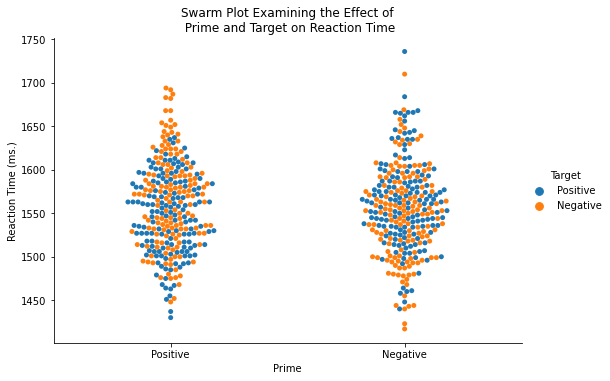


What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
5


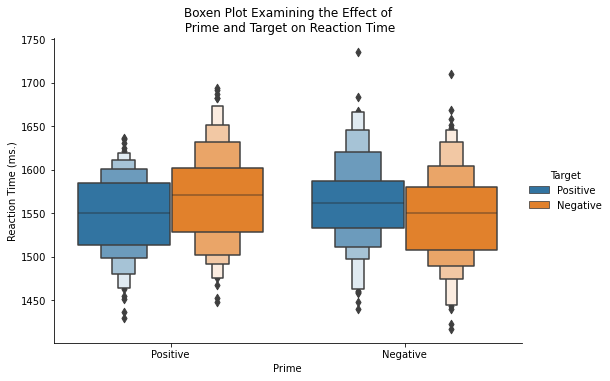


What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
6


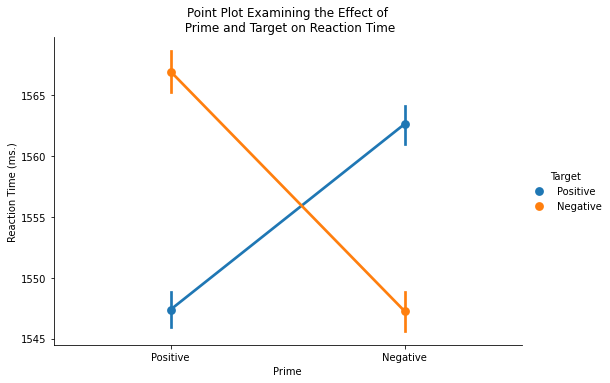


What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
b

What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

5
Executing ANOVA
                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
Prime         0.3132 1.0000 147.0000 0.5766
Target        0.2365 1.0000 147.0000 0.6275
Prime:Target 17.1778 1.0000 147.0000 0.0001

Would you like to carry out pairwise comparisons? y/n
(Note these are only recommended when there is a significant interaction between Prime and Target)

y

Executin

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.anova import AnovaRM
print('Welcome to my 2-way repeated measures ANOVA program.')
def load_data_function():
    global participant
    global data
    global IV1
    global IV2
    global DV
    global IV1_LVL1
    global IV1_LVL2
    global IV2_LVL1
    global IV2_LVL2
    file = input('''
Enter your csv file name (e.g. 'data.csv'). 
Please ensure that data is in long format before entering: 

''')
    if '.csv' in file:
        print('csv type file loaded in.')
        data = pd.read_csv(file)
        mapping = {data.columns[0]: 'Participant'}
        data = data.rename(columns=mapping)
        participant = data.columns[0]
        IV1 = data.columns[1]
        IV2 = data.columns[2]
        DV = data.columns[3]
        IV1_Dist = data[IV1].unique()
        IV2_Dist = data[IV2].unique()
        IV1_LVL1 = IV1_Dist[0]
        IV1_LVL2 = IV1_Dist[1]
        IV2_LVL1 = IV2_Dist[0]
        IV2_LVL2 = IV2_Dist[1]
    else:
        print('Invalid option, try again. Ensure data file is of csv type.')
        load_data_function_again()
def load_data_function_again():
    load_data_function()
load_data_function()  
def anova_function():
    options = input('''
What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

''')       
    if options == '1':
        print('Displaying Data Frame')
        display(data)
    elif options == '2':
        def tidy_data_function():
            global data
            global IV1
            global IV2
            global DV
            columns_levels = input('''
What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter b to go back

        ''')
            if columns_levels == '1':
                print('''
Ensure that you input the variables in the same order as your dataset.

''')
                IV1 = input('''
Enter your first independent variable: 

            ''')
                IV2 = input('''
Enter your second independent variable: 

            ''')
                DV = input('''
Enter your dependent variable: 
            
            ''')
                mapping = {data.columns[1]: IV1, data.columns[2]: IV2, data.columns[3]: DV}
                data = data.rename(columns=mapping)
            elif columns_levels == '2':
                def Which_IV_function():
                    global data
                    global IV1_LVL1
                    global IV1_LVL2
                    global IV2_LVL1
                    global IV2_LVL2
                    global new_IV1_LVL1
                    global new_IV1_LVL2
                    global new_IV2_LVL1
                    global new_IV2_LVL2
                    Which_IV = input('Which independent variable would you like to rename the levels of?\nEnter 1 to change the levels of ' + IV1 + '\nEnter 2 to change the levels of ' + IV2 + '\nEnter b to go back\n\n') 
                    if Which_IV == '1':
                        new_IV1_LVL1 = input('''
What would you like to rename your first level to?

''')
                        new_IV1_LVL2 = input('''
What would you like to rename your second level to?

''')
                        data = data.replace([IV1_LVL1],[new_IV1_LVL1])
                        data = data.replace([IV1_LVL2],[new_IV1_LVL2])
                        IV1_LVL1 = new_IV1_LVL1
                        IV1_LVL2 = new_IV1_LVL2
                    elif Which_IV == '2':
                        new_IV2_LVL1 = input('''
What would you like to rename your first level to?

''')
                        new_IV2_LVL2 = input('''
What would you like to rename your second level to?

''')
                        data = data.replace([IV2_LVL1],[new_IV2_LVL1])
                        data = data.replace([IV2_LVL2],[new_IV2_LVL2])
                        IV2_LVL1 = new_IV2_LVL1
                        IV2_LVL2 = new_IV2_LVL2
                    elif Which_IV == 'b':
                        tidy_data_function()
                    else:                            
                        print('Invalid option. Try again.')
                    Which_IV_function_again()
                def Which_IV_function_again():
                    Which_IV_function()
                Which_IV_function()
            elif columns_levels == 'b':
                anova_function()
            else:
                print('Invalid choice. Try again')
                tidy_data_function_again()
            def tidy_data_function_again():
                tidy_data_function()
            tidy_data_function_again()
        tidy_data_function()
    elif options == '3':
        print ('Displaying summary statistics')
        display(data.loc[:, data.columns!= participant].groupby([IV1,IV2]).aggregate([np.mean, np.std, np.median]))
    elif options == '4':
        DV_meas = input('''
What was your dependent variable measured in?

''')
        def visualisations_function():
            vis_type = input(
'''
What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
''')
            if vis_type == '1':
                vis_type = 'strip'
                ci=None
            elif vis_type == '2':
                vis_type = 'swarm'
                ci=None
            elif vis_type == '3':
                vis_type = 'box'
                ci=None
            elif vis_type == '4':
                vis_type = 'violin'
                ci=None
            elif vis_type == '5':
                vis_type = 'boxen'
                ci=None
            elif vis_type == '6':
                vis_type = 'point'
                ci = 30
            elif vis_type == '7':
                vis_type = 'bar'  
                ci = 100
            elif vis_type == 'b':
                anova_function()
            else:
                print('Invalid choice. Please try again.')
                visualisations_function_again()
            sns.catplot(x=IV1, y=DV, hue=IV2, data=data, kind=vis_type, ci=ci, aspect=1.5)
            plt.title(vis_type.title() + ' Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
            plt.ylabel(DV + ' (' + DV_meas + ')')
            plt.show()
            visualisations_function_again()
        def visualisations_function_again():
            visualisations_function()   
        visualisations_function()  
    elif options == '5':
        print('Executing ANOVA')
        print(AnovaRM(data=data, depvar=DV, within=[IV1,IV2], subject=participant).fit())
        pairwise_comp = input(
'Would you like to carry out pairwise comparisons? y/n\n(Note these are only recommended when there is a significant interaction between ' + IV1 + ' and ' + IV2 + ')\n\n')
        if pairwise_comp == 'y':
            print('''
Executing pairwise comparisons:       
            ''')
            print('t-test result for ' + IV2_LVL1 + ' ' + IV2 + 's in ' + IV1_LVL1 + ' and ' + IV1_LVL2 + ' ' + IV1 + 's:')
            index = (data[IV1]==IV1_LVL1) & (data[IV2]==IV2_LVL1)
            LVL1_LVL1 = data[index][DV]
            index = (data[IV1]==IV1_LVL2) & (data[IV2]==IV2_LVL1)
            LVL2_LVL1 = data[index][DV]
            print(stats.ttest_rel(LVL1_LVL1, LVL2_LVL1))
            print('''
''')
            print('t-test result for ' + IV2_LVL2 + ' ' + IV2 + 's in ' + IV1_LVL1 + ' and ' + IV1_LVL2 + ' ' + IV1 + 's:')
            index = (data[IV1]==IV1_LVL1) & (data[IV2]==IV2_LVL2)
            LVL1_LVL2 = data[index][DV] 
            index = (data[IV1]==IV1_LVL2) & (data[IV2]==IV2_LVL2)
            LVL2_LVL2 = data[index][DV]
            print(stats.ttest_rel(LVL1_LVL2, LVL2_LVL2))
        elif pairwise_comp == 'n':
            anova_function()
    else:
        print('Invalid choice. Please try again.')
    anova_function_again()

def anova_function_again():
    anova_function()
    
anova_function()